In [1]:
import sys; sys.path.insert(0, '../')
import geoplot as gplt
import geoplot.crs as ccrs
import geopandas as gpd
import pandas as pd
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from shapely.geometry import Point

cdata = pd.read_csv("../data/nyc_collisions/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return Point(0, 0)
    else:
        return Point(long, lat)

collisions = gpd.GeoDataFrame(cdata, geometry=cdata.apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

latmax, latmin, longmax, longmin = collisions['LATITUDE'].max(), collisions['LATITUDE'].min(),\
                                   collisions['LONGITUDE'].max(), collisions['LONGITUDE'].min()

# def genpattern(srs):
#     return (srs['LATITUDE'] - latmin) / (latmax - latmin)

# collisions['LATDEP'] = collisions.apply(genpattern, axis='columns')

del cdata

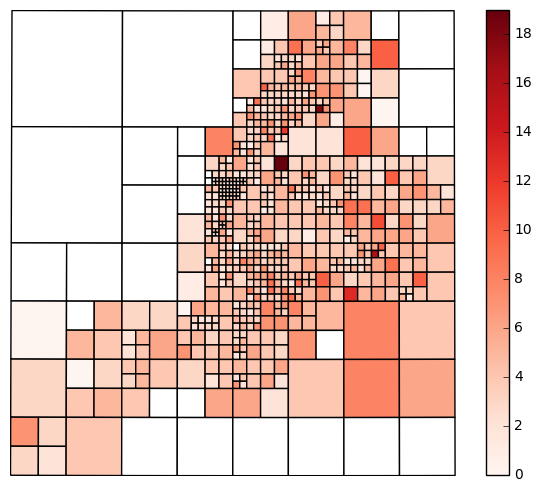

In [6]:
gplt.aggplot(collisions, projection=ccrs.AlbersEqualArea(), 
             hue='NUMBER OF PERSONS INJURED', agg=np.max,
             nmin=100, nmax=500, cmap='Reds')

In [7]:
# gplt.aggplot(collisions, projection=ccrs.AlbersEqualArea(), 
#              hue='NUMBER OF PERSONS INJURED', agg=np.max,
#              cmap='Reds', linewidth=0.5, edgecolor='white')

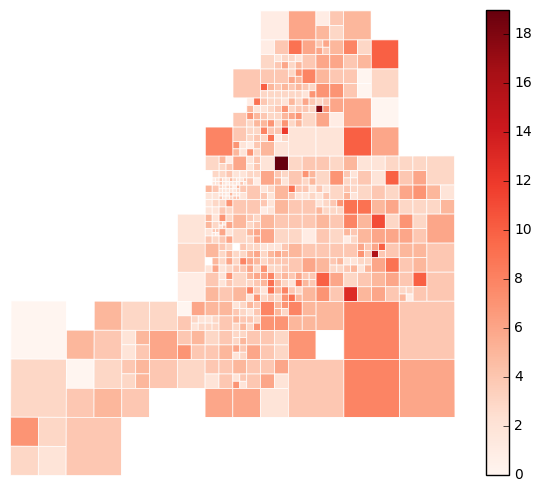

In [7]:
gplt.aggplot(collisions, projection=ccrs.AlbersEqualArea(), 
             hue='NUMBER OF PERSONS INJURED', agg=np.max,
             nmin=100, nmax=500, cmap='Reds', linewidth=0.5, edgecolor='white')

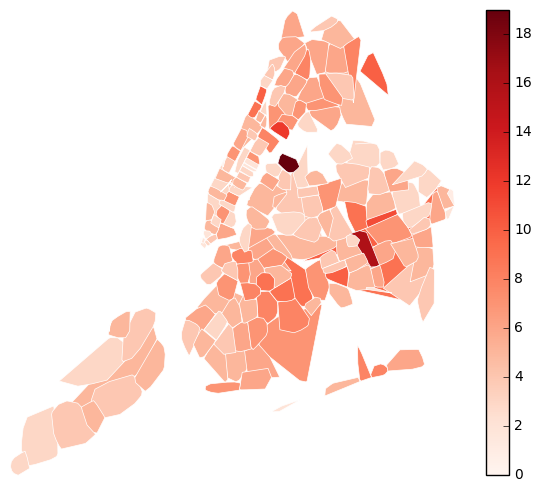

In [12]:
gplt.aggplot(collisions, projection=ccrs.AlbersEqualArea(), 
             hue='NUMBER OF PERSONS INJURED', agg=np.max, by='ZIP CODE',
             cmap='Reds', linewidth=0.5, edgecolor='white')

In [45]:
zip_codes = gpd.read_file("../data/nyc_zip_codes/ZIP_CODE_040114.shp")
zip_codes['ZIPCODE'] = zip_codes['ZIPCODE'].astype(int)
zip_codes = zip_codes.set_index("ZIPCODE")

In [85]:
zip_codes = zip_codes.reset_index().drop_duplicates('ZIPCODE').set_index('ZIPCODE')

In [67]:
collisions = collisions[~collisions['ZIP CODE'].isin([10000, 10803, 11242])]  
# 10000: ZIP CODE used for Central Park
# 10803: Upstate ZIP CODE. One entry.
# 11242: Probably the same as 10803? One entry.

In [66]:
collisions[collisions['ZIP CODE'].isin([11242])] 

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry
98870,03/24/2016,15:10,BROOKLYN,11242.0,40.693244,-73.99066,"(40.6932438, -73.9906602)",NaN,NaN,26 COURT STREET,...,NaN,NaN,NaN,3420739,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,POINT (-73.99066020000002 40.6932438)


In [88]:
zip_codes = zip_codes.to_crs(epsg=4326)

> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(1034)aggplot()
-> sorted_indices = np.array(sorted(enumerate(gpd.GeoSeries(sectors).area.values),
(Pdb) c


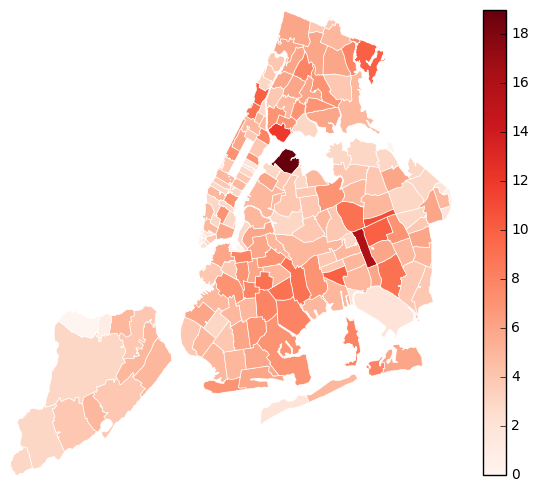

In [90]:
gplt.aggplot(collisions, projection=ccrs.AlbersEqualArea(), 
             hue='NUMBER OF PERSONS INJURED', agg=np.max, 
             by='ZIP CODE', geometry=zip_codes.geometry,
             cmap='Reds', linewidth=0.5, edgecolor='white')